# CPC251 Assignment 1

#### In the assignment, you are given a dataset. The dataset is available in eLearn@USM. You need to implement the gradient descent algorithm to estimate (train) the weights of the linear regression model. You must use Python programming language with Jupyter Notebook.

#### Split the given dataset into two training and test with a ratio of 8:2. Use the training set to estimate the weights and the test set to evaluate the linear regression model with the estimated weights. Define at least three (3) functions as follows:

```
def train_model(X, y, alpha, max_epoch):
       """ Pass four arguments
       Arguments:
             X: input features
             y: responses
             alpha: learning rate
             max_epoch: maximum epochs
       Returns:
             w: estimated weights
             hist_loss: training loss history
       """
def prediction(w, X):
       """ Pass two arguments
       Arguments:
             w: weights
             X: input features
       Returns:
             yhat: predicted values
       """
def loss_fn(y, yhat):
       """ Pass two arguments
       Arguments:
             y: responses
             yhat: predicted value
       Returns:
             loss: loss value
       """
```

#### Display the training loss value for each epoch of the training loop.

#### Display the estimated weights (after model training).

#### Display the training loss against epoch graph (after model training).

#### Evaluate the linear regression model with the estimated weights on the test set and display at least R-squared and mean squared error measures.

#### Document the codes using markdown and comments.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

# Upload dataset file (csv)
uploaded = files.upload()

# Load csv data into dataframe
df = pd.read_csv(io.BytesIO(uploaded['assignment1_dataset.csv']))

Saving assignment1_dataset.csv to assignment1_dataset.csv


In [ ]:
# Split the dataset into two set (training and test) with a ratio of 8:2
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

# Responses
y_train = training_data.response
y_test = testing_data.response

# Input features
x_train = training_data.drop('response',axis=1)
x_test = testing_data.drop('response',axis=1)

# Max_epoch
N = 100

#### Printing shapes of testing and training sets for personal reference

In [ ]:
print("shape of original dataset ----", df.shape)
print("shape of split training dataset ----", training_data.shape)
print("shape of split testing dataset ----", testing_data.shape)
print("shape of input training set --", x_train.shape)
print("shape of output training set -", y_train.shape)
print("shape of input testing set  --", x_test.shape)
print("shape of output testing set  -", y_test.shape)

shape of original dataset ---- (1000, 6)
shape of split training dataset ---- (800, 6)
shape of split testing dataset ---- (200, 6)
shape of input training set -- (800, 5)
shape of output training set - (800,)
shape of input testing set  -- (200, 5)
shape of output testing set  - (200,)


#### Functions to train the model, predict the value (hypothesis) and loss (cost) function

In [ ]:
# Fit the model to the dataset
def train_model(X, y, alpha, max_epoch):
    """
    print("X: " + str(X))
    """
    
    # Get number of samples
    m = X.shape[0]
    ones = np.ones((m, 1))
    # Get new X with X0's =1
    X = np.concatenate((ones, X), axis=1)
    n = X.shape[1]
    theta = np.ones(n)
    """
    print("Theta: " + str(theta))
    print("m: " + str(m))
    print("n: " + str(n))
    print("X: " + str(X))
    """
    
    # Making hypothesis
    h = prediction(X, theta)
    """
    print("h: " + str(h.shape))
    """
    
    # Gradient descent algorithm
    hist_loss = np.ones(max_epoch)
    for i in range(0, max_epoch):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h-y)
        for j in range(1, n):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X[:, j])
        # Making new hypothesis
        h = prediction(X, theta)
        # Call loss_fn function
        hist_loss[i] = loss_fn(m, h, y)
        # Display the training loss value for each epoch of the training loop
        print("Iteration " + str(i + 1) + ": " + str(hist_loss[i]))
    return hist_loss, theta

# Calculate prediction
def prediction(X, theta):
    yhat = np.dot(X, theta)
    return yhat

# Calculte training loss value
def loss_fn(sample, y, yhat):
    loss = 1/(2*sample) * sum(np.square(y-yhat))
    return loss

#### Training the model

In [ ]:
# Get started to training process
cost, w = train_model(x_train, y_train, 0.1, N) # Common learning rate: 0.1, 0.01, 0.001
                                                   # Use smaller learning rate, larger iterations to get better result

Iteration 1: 653.9810023759067
Iteration 2: 521.7509830048905
Iteration 3: 416.82448876433693
Iteration 4: 333.5551228251323
Iteration 5: 267.4658980770493
Iteration 6: 215.00669709761416
Iteration 7: 173.3621054471869
Iteration 8: 140.29914223872305
Iteration 9: 114.04659342496936
Iteration 10: 93.19937990914521
Iteration 11: 76.64275936118973
Iteration 12: 63.492242612121665
Iteration 13: 53.045962115149166
Iteration 14: 44.74690820631945
Iteration 15: 38.152985957974565
Iteration 16: 32.9132707208325
Iteration 17: 28.749177280484318
Iteration 18: 25.439524339295133
Iteration 19: 22.80868735990396
Iteration 20: 20.7172002158913
Iteration 21: 19.05429872690641
Iteration 22: 17.7320042439037
Iteration 23: 16.680428722629376
Iteration 24: 15.844048715105544
Iteration 25: 15.178748010613242
Iteration 26: 14.649470113405624
Iteration 27: 14.228354606379026
Iteration 28: 13.89325750214927
Iteration 29: 13.626576338547734
Iteration 30: 13.414317153957557
Iteration 31: 13.245353466091581
Ite

Estimated weights:
w0 : 9.648021553456287
w1 : 11.926237375976964
w2 : -0.15240746421764612
w3 : 0.02464271106534751
w4 : 36.87657773691043
w5 : 0.20187129589094868




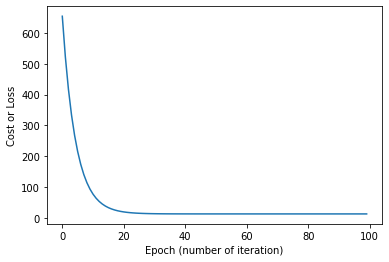

Lowest cost = 12.583979118863596
Cost after 100 iterations = 12.583979118863596


In [ ]:
# Display estimated weight after model training
print("Estimated weights:")
for i in range(w.size):
    print("w" + str(i) + " : " + str(w[i]))

print("\n")

# Display the training loss against epoch graph after model training
plt.plot(cost)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel("Cost or Loss")
plt.show()
print("Lowest cost = " + str(np.min(cost)))
print("Cost after " + str(N) + " iterations = " + str(cost[-1]))

#### Error Functions

In [ ]:
def R_Square_Err(x_test, weights, y_test):
    # Formula R_Square_Err = 1 - Summation(yi - yi_hat)^2/Summation(yi - y_bar)^2
    
    # Get the mean of y_test
    y_bar = y_test.mean()
    
    # Calculate prediction for each input
    y_hat = prediction(x_test, weights)
    
    # Calculate numerator and denominator for the formula
    numerator = np.sum(np.power(y_test.subtract(y_hat), 2))
    denominator = np.sum(np.power(y_test.subtract(y_bar), 2))
    
    # Solve the formula
    r_sq_err = 1 - (numerator/denominator)
    
    # Return the value of R_Square_Err
    return r_sq_err

def MSE(x_test, weights, y_test):
    # Formula MSE = 1/n * Summation(yi - yi_hat)^2
    
    # Calculate prediction for each input
    y_hat = prediction(x_test, weights)
    
    # Calculate Summation*yi - yi_hat)^2
    sum_square_diff = np.sum(np.power(y_test.subtract(y_hat), 2))

    # Solve the formula
    mse = sum_square_diff/y_test.size
    
    # Return the value of MSE
    return mse

def MAE(x_test, weights, y_test):
    # Formula MAE = 1/n & Summation(abs(yi - yi_hat))
    
    # Calculate prediction for each input
    y_hat = prediction(x_test, weights)
    
    # Calculate Summation((abs(yi - yi_hat))
    sum_abs_diff = np.sum(np.absolute(y_test.subtract(y_hat)))
    
    # Calculate the formula
    mae = sum_abs_diff/y_test.size
    
    # Return the value of MAE
    return mae

#### Evaluating Linear Regression Model and Displaying Errors

In [ ]:
# Add the column x0 = 1 for all rows
x_test = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)

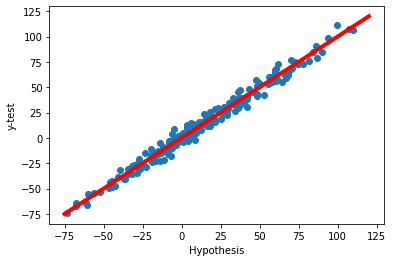


Estimated weights:
w0 : 9.648021553456287
w1 : 11.926237375976964
w2 : -0.15240746421764612
w3 : 0.02464271106534751
w4 : 36.87657773691043
w5 : 0.20187129589094868

Hypothesis: 
h(f0, f1, f2, f3, f4, f5) = (9.648021553456287 * f0) + (11.926237375976964 * f1) + (-0.15240746421764612 * f2) + (0.02464271106534751 * f3) + (36.87657773691043 * f4) + (0.20187129589094868 * f5)

Error measurements: 
R-squared Error for the hypothesis is: 0.9831246942622107
Mean Squared Error for the hypothesis is: 24.30929387147798
Mean Absolute Error for the hypothesis is: 4.0426893285659355


In [ ]:
# Display Y predicted against Y test
    
# Calculate prediction for each input
y_hat = prediction(x_test, w)
    
plt.scatter(y_hat, y_test)

plt.xlabel("Hypothesis")
plt.ylabel( "y-test")

# Linear plot
x = np.linspace(-75, 120, 100)
y = x
plt.plot(x, y, 'r', linewidth=4)
plt.show()

# Display estimated weights
print("\nEstimated weights:")
for i in range(w.size):
    print("w" + str(i) + " : " + str(w[i]))
    
# Display errors
r_square_err = R_Square_Err(x_test, w, y_test)
mse = MSE(x_test, w, y_test)
mae = MAE(x_test, w, y_test)

print("\nHypothesis: ")
print("h(f0, f1, f2, f3, f4, f5) = ", end = "")
for i in range(w.size):
    print("(" + str(w[i])+ " * f" + str(i) + ")", end = "")
    if (i != w.size - 1):
        print(" + ", end = "")

print("\n\nError measurements: ")
print("R-squared Error for the hypothesis is: " + str(r_square_err))
print("Mean Squared Error for the hypothesis is: " + str(mse))
print("Mean Absolute Error for the hypothesis is: " + str(mae))